In [37]:
from re import split
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# path = Path('datas')
# path_img = path/'database'

# path_label = path/'databaselabel'
# codes = ['smoke', 'flame', 'Void']
# url = URLs.
# local_path = URLs.path(url)
# test_eq(local_path.parent, fastai_path('archive'))
# local_path

In [39]:
fnames = get_image_files(path_img)
print(fnames[0])

datas/database/000366.jpg


In [40]:
lbl_names = get_image_files(path_label)
print(lbl_names[0])

datas/databaselabel/label_000373.jpg


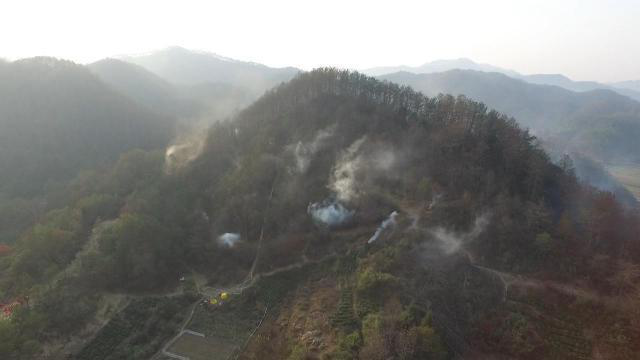

In [41]:
img = Image.open(fnames[0])
img.show()

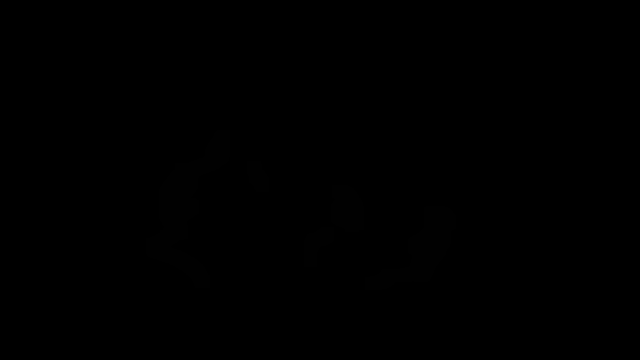

In [42]:
img = Image.open(lbl_names[0])
img.show()

In [45]:
get_y_fn = lambda x: path_label/f'label_{x.name}'
defaults.use_cuda = True

In [46]:
dls = SegmentationDataLoaders.from_label_func(
    path_img,
    bs = 1,
    fnames = fnames,
    label_func = get_y_fn,
    codes = codes,
    item_tfms = [Resize((255, 255))],
    batch_tfms = [Normalize.from_stats(*imagenet_stats)],
)

In [47]:
name2id = {v:k for k, v in enumerate(codes)}
void_code = name2id['Void']

def acc_smoke(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim = 1)[mask]==target[mask]).float().mean()

metrics = acc_smoke

In [48]:
learn = unet_learner(dls, models.resnet34, metrics = metrics,
                    self_attention=Fals)

In [49]:
learn.model

DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05

SuggestedLRs(valley=7.585775892948732e-05)

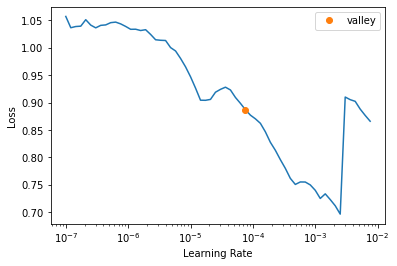

In [50]:
learn.lr_find()

In [51]:
lr = 7.58e-5
learn.fit_one_cycle(13, slice(lr))

epoch,train_loss,valid_loss,acc_smoke,time
0,0.253253,0.219659,0.917754,00:35
1,0.176335,0.164910,0.931918,00:34
2,0.185301,0.146890,0.938833,00:34
3,0.146163,0.160491,0.935247,00:33
4,0.135080,0.139954,0.942064,00:34
5,0.134227,0.189033,0.931044,00:33
6,0.106816,0.135090,0.942098,00:33
7,0.093609,0.126923,0.946311,00:34
8,0.099753,0.133293,0.941652,00:33
9,0.094640,0.120832,0.950136,00:33


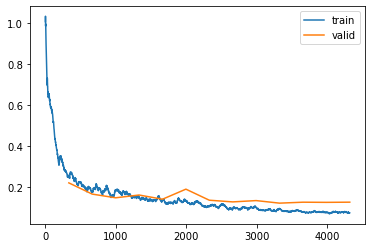

In [52]:
learn.recorder.plot_loss(skip_start=0, with_valid=True)

In [53]:
learn.save('stage-1')
learn.load('stage-1')

SuggestedLRs(valley=6.30957365501672e-05)

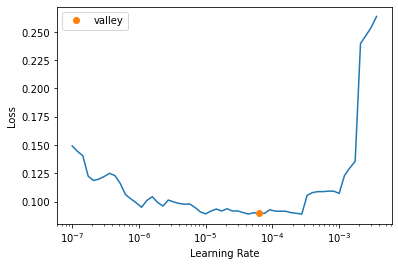

In [54]:
learn.unfreeze()
learn.lr_find()

In [55]:
lr_max = 6.3e-5

In [56]:
learn.fit_one_cycle(4, lr_max)

epoch,train_loss,valid_loss,acc_smoke,time
0,0.115634,0.125789,0.948024,00:40
1,0.104782,0.125880,0.944287,00:39
2,0.082489,0.115972,0.951734,00:39
3,0.073445,0.112825,0.953863,00:40


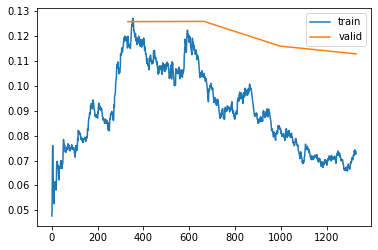

In [57]:
learn.recorder.plot_loss(skip_start=0, with_valid=True)

Path('datas/database/models/attunet.pth')

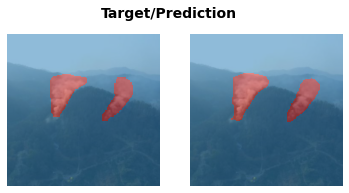

In [58]:
learn.show_results()
learn.save('attunet')

In [ ]:
learn.show_results()

In [ ]:
learn.show_results()

In [ ]:
learn.show_results()

In [ ]:
learn.show_results()

Path('datas/database/models/alunet.pth')

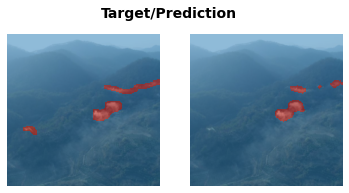

In [59]:
learn.show_results()
learn.save('alunet')

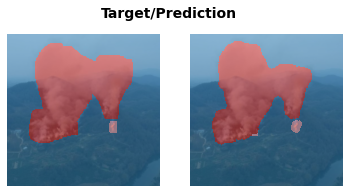

In [60]:
learn.show_results()

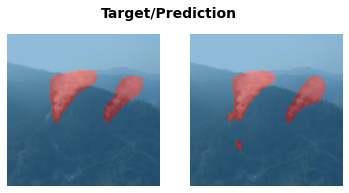

In [61]:
learn.show_results()

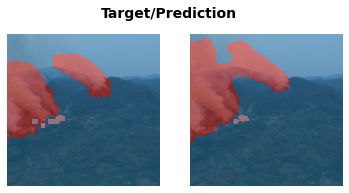

In [62]:
learn.show_results()

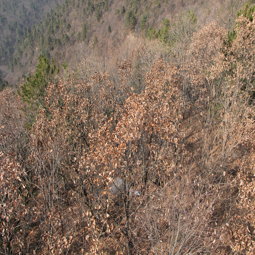

In [117]:
img = Image.open('datas/huangling/观景台拍摄/IMG_6955.JPG').resize((255, 255))
img.show()

In [118]:
img = PILImage(img)

In [119]:
learn.load('alunet')
# learn.load('attunet')

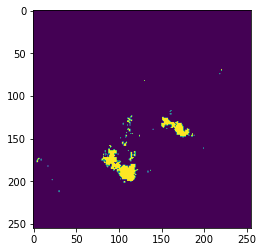

In [120]:
prediction_mask = learn.predict(img)
seg_map = prediction_mask[0]
torch.Tensor.ndim = property(lambda self: len(self.shape))
plt.imshow(seg_map)